In [1]:
# I'm importing pandas and numpy for data processing and linear algebra
import pandas as pd
import numpy as np

In [2]:
#Reading the csv file and set up content inside a Dataframe, low_memory=False to avoid warning
dfZika = pd.read_csv("cdc_zika.csv", low_memory=False)

In [3]:
#Using head() to check columns name and a preview of the first rows
dfZika.head()

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,NaN,NaN,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,NaN,NaN,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,NaN,NaN,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,NaN,NaN,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,NaN,NaN,127,cases


In [4]:
#Checking the column names
dfZika.columns

Index(['report_date', 'location', 'location_type', 'data_field',
       'data_field_code', 'time_period', 'time_period_type', 'value', 'unit'],
      dtype='object')

In [5]:
#Finding out general information of file
dfZika.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107619 entries, 0 to 107618
Data columns (total 9 columns):
report_date         107612 non-null object
location            107612 non-null object
location_type       107612 non-null object
data_field          107612 non-null object
data_field_code     107612 non-null object
time_period         0 non-null float64
time_period_type    0 non-null float64
value               107481 non-null object
unit                107612 non-null object
dtypes: float64(2), object(7)
memory usage: 7.4+ MB


In [6]:
#Counting the number of rows that contain values
dfZika.count()

report_date         107612
location            107612
location_type       107612
data_field          107612
data_field_code     107612
time_period              0
time_period_type         0
value               107481
unit                107612
dtype: int64

In [7]:
#Looking for nulls
pd.isnull(dfZika).sum(axis = 0)

report_date              7
location                 7
location_type            7
data_field               7
data_field_code          7
time_period         107619
time_period_type    107619
value                  138
unit                     7
dtype: int64

In [8]:
#The fiels time_period and time_period_type are optional and not relevant for my research, so I will drop those columns.
dfZika.drop(columns=['time_period','time_period_type'],axis=1, inplace=True)

In [9]:
dfZika.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107619 entries, 0 to 107618
Data columns (total 7 columns):
report_date        107612 non-null object
location           107612 non-null object
location_type      107612 non-null object
data_field         107612 non-null object
data_field_code    107612 non-null object
value              107481 non-null object
unit               107612 non-null object
dtypes: object(7)
memory usage: 5.7+ MB


In [10]:
#I want to count the missing data by Column

missingdf = pd.DataFrame(dfZika.isna().sum()).rename(columns = {0: 'total'})
missingdf['percent'] = missingdf['total'] / len(dfZika)
missingdf

,total,percent
report_date,7,0.000065
location,7,0.000065
location_type,7,0.000065
data_field,7,0.000065
data_field_code,7,0.000065
value,138,0.001282
unit,7,0.000065


In [11]:
# I can see, There is 138 missing for the value column and as I cannot figure out these values, my
# decision is to remove those rows.It will not affect my research.
# I will keep the good ones rows (not missing data) for value column and report date, as well.
notmissingdata = np.logical_and(pd.notnull(dfZika['report_date']),
                           pd.notnull(dfZika['value'])) 
dfZika = dfZika[notmissingdata]

In [12]:
#Checking again the missing data by Column

missingdf = pd.DataFrame(dfZika.isna().sum()).rename(columns = {0: 'total'})
missingdf['percent'] = missingdf['total'] / len(dfZika)
missingdf

,total,percent
report_date,0,0.0
location,0,0.0
location_type,0,0.0
data_field,0,0.0
data_field_code,0,0.0
value,0,0.0
unit,0,0.0


In [13]:
dfZika.head()

,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,127,cases


In [14]:
#Now it is time to convert report_date to Datetime dtype. Also, replacing (_) underscore by dash(-)
dfZika['report_date'] = [x.replace('_', '-') for x in dfZika['report_date']]
dfZika['report_date'] = pd.to_datetime(dfZika['report_date'],format='%Y-%m-%d')

In [15]:
#I want to check that the report_date column now is Datetime
dfZika.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107481 entries, 0 to 107618
Data columns (total 7 columns):
report_date        107481 non-null datetime64[ns]
location           107481 non-null object
location_type      107481 non-null object
data_field         107481 non-null object
data_field_code    107481 non-null object
value              107481 non-null object
unit               107481 non-null object
dtypes: datetime64[ns](1), object(6)
memory usage: 6.6+ MB


In [16]:
dfZika.head()

,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,127,cases


In [17]:
# Converting value column to numeric
dfZika['value'] = pd.to_numeric(dfZika['value'], 'coerce')
#Looking for nulls after use the "coerce"
pd.isnull(dfZika).sum(axis = 0)

report_date        0
location           0
location_type      0
data_field         0
data_field_code    0
value              3
unit               0
dtype: int64

In [18]:
#Cleaning again NaN from value column
notmissingdata = np.logical_and(pd.notnull(dfZika['report_date']),
                           pd.notnull(dfZika['value'])) 
dfZika = dfZika[notmissingdata]

In [19]:
#Checking again the missing data by Column

missingdf = pd.DataFrame(dfZika.isna().sum()).rename(columns = {0: 'total'})
missingdf['percent'] = missingdf['total'] / len(dfZika)
missingdf

,total,percent
report_date,0,0.0
location,0,0.0
location_type,0,0.0
data_field,0,0.0
data_field_code,0,0.0
value,0,0.0
unit,0,0.0


In [20]:
#Getting a preview of the rows after converting value column to numeric
dfZika.head()

,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0.0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0.0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,2.0,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,1.0,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,127.0,cases


Text(0.5, 1.0, 'Top 10 Locations where Zika virus was reported')

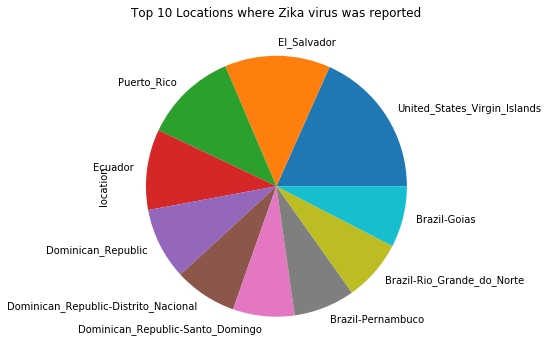

In [21]:
#Now I think my dataframe is clean, I will create a plot just to see how it looks.

%matplotlib inline
import matplotlib.pyplot as plt


dfZika.location.value_counts()[:10].plot(kind='pie', figsize=(6, 6))
plt.title("Top 10 Locations where Zika virus was reported")


In [22]:
#Now as the main aim of this project is find out how fast the Zika virus was expanded, let's see the cases by country

dfZika['country'] = dfZika['location']
dfZika['country'] = dfZika['country'].astype(str)
dfZika['country'] = dfZika['country'].apply(lambda x: pd.Series(x.split('-')))
dfZika.country.unique()


array(['Argentina', 'Brazil', 'Norte', 'Nordeste', 'Sudeste', 'Sul',
       'Centro', 'Colombia', 'Dominican_Republic', 'Ecuador',
       'El_Salvador', 'Guatemala', 'Haiti', 'Mexico', 'Nicaragua',
       'Panama', 'Puerto_Rico', 'United_States',
       'United_States_Virgin_Islands'], dtype=object)

In [23]:
#Checking the number of reports by country
dfZika.country.value_counts()

Colombia                        86887
Dominican_Republic               5716
Brazil                           4132
Mexico                           2880
United_States                    2453
Argentina                        2016
El_Salvador                       990
Ecuador                           796
United_States_Virgin_Islands      509
Guatemala                         479
Puerto_Rico                       260
Panama                            148
Nicaragua                         125
Haiti                              52
Sudeste                             7
Sul                                 7
Nordeste                            7
Norte                               7
Centro                              7
Name: country, dtype: int64

In [24]:
# Let's check what the values: Nordeste, Sul, Norte, Centro, Sudeste mean

filtro = dfZika['country'] == "Norte"
new_frame_filtro = dfZika[filtro]
new_frame_filtro

,report_date,location,location_type,data_field,data_field_code,value,unit,country
6073,2016-04-02,Norte,region,zika_reported,BR0011,6295.0,cases,Norte
6106,2016-04-23,Norte,region,zika_reported,BR0011,8545.0,cases,Norte
6139,2016-04-30,Norte,region,zika_reported,BR0011,8379.0,cases,Norte
6172,2016-05-07,Norte,region,zika_reported,BR0011,8053.0,cases,Norte
6205,2016-05-14,Norte,region,zika_reported,BR0011,8053.0,cases,Norte
6238,2016-05-21,Norte,region,zika_reported,BR0011,8432.0,cases,Norte
6271,2016-05-28,Norte,region,zika_reported,BR0011,9022.0,cases,Norte


In [25]:
filtro = dfZika['country'] == "Sul"
new_frame_filtro = dfZika[filtro]
new_frame_filtro

,report_date,location,location_type,data_field,data_field_code,value,unit,country
6096,2016-04-02,Sul,region,zika_reported,BR0011,1797.0,cases,Sul
6129,2016-04-23,Sul,region,zika_reported,BR0011,2197.0,cases,Sul
6162,2016-04-30,Sul,region,zika_reported,BR0011,2343.0,cases,Sul
6195,2016-05-07,Sul,region,zika_reported,BR0011,2431.0,cases,Sul
6228,2016-05-14,Sul,region,zika_reported,BR0011,2431.0,cases,Sul
6261,2016-05-21,Sul,region,zika_reported,BR0011,2491.0,cases,Sul
6294,2016-05-28,Sul,region,zika_reported,BR0011,2463.0,cases,Sul


In [26]:
filtro = dfZika['country'] == "Sudeste"
new_frame_filtro = dfZika[filtro]
new_frame_filtro

,report_date,location,location_type,data_field,data_field_code,value,unit,country
6091,2016-04-02,Sudeste,region,zika_reported,BR0011,35505.0,cases,Sudeste
6124,2016-04-23,Sudeste,region,zika_reported,BR0011,46318.0,cases,Sudeste
6157,2016-04-30,Sudeste,region,zika_reported,BR0011,48027.0,cases,Sudeste
6190,2016-05-07,Sudeste,region,zika_reported,BR0011,54803.0,cases,Sudeste
6223,2016-05-14,Sudeste,region,zika_reported,BR0011,54803.0,cases,Sudeste
6256,2016-05-21,Sudeste,region,zika_reported,BR0011,61309.0,cases,Sudeste
6289,2016-05-28,Sudeste,region,zika_reported,BR0011,65328.0,cases,Sudeste


In [27]:
filtro = dfZika['country'] == "Nordeste"
new_frame_filtro = dfZika[filtro]
new_frame_filtro

,report_date,location,location_type,data_field,data_field_code,value,unit,country
6081,2016-04-02,Nordeste,region,zika_reported,BR0011,30286.0,cases,Nordeste
6114,2016-04-23,Nordeste,region,zika_reported,BR0011,43000.0,cases,Nordeste
6147,2016-04-30,Nordeste,region,zika_reported,BR0011,47709.0,cases,Nordeste
6180,2016-05-07,Nordeste,region,zika_reported,BR0011,51065.0,cases,Nordeste
6213,2016-05-14,Nordeste,region,zika_reported,BR0011,51065.0,cases,Nordeste
6246,2016-05-21,Nordeste,region,zika_reported,BR0011,54165.0,cases,Nordeste
6279,2016-05-28,Nordeste,region,zika_reported,BR0011,59745.0,cases,Nordeste


In [28]:
filtro = dfZika['country'] == "Centro"
new_frame_filtro = dfZika[filtro]
new_frame_filtro

,report_date,location,location_type,data_field,data_field_code,value,unit,country
6100,2016-04-02,Centro-Oeste,region,zika_reported,BR0011,17504.0,cases,Centro
6133,2016-04-23,Centro-Oeste,region,zika_reported,BR0011,20101.0,cases,Centro
6166,2016-04-30,Centro-Oeste,region,zika_reported,BR0011,21364.0,cases,Centro
6199,2016-05-07,Centro-Oeste,region,zika_reported,BR0011,21756.0,cases,Centro
6232,2016-05-14,Centro-Oeste,region,zika_reported,BR0011,21756.0,cases,Centro
6265,2016-05-21,Centro-Oeste,region,zika_reported,BR0011,22508.0,cases,Centro
6298,2016-05-28,Centro-Oeste,region,zika_reported,BR0011,24683.0,cases,Centro


In [29]:
# I have seen that the data_field_code starting with BR correspond to Brazil, So I will replace that location
dfZika['country'] = [x.replace('Norte', 'Brazil') for x in dfZika['country']]
dfZika['country'] = [x.replace('Sul', 'Brazil') for x in dfZika['country']]
dfZika['country'] = [x.replace('Sudeste', 'Brazil') for x in dfZika['country']]
dfZika['country'] = [x.replace('Nordeste', 'Brazil') for x in dfZika['country']]
dfZika['country'] = [x.replace('Centro', 'Brazil') for x in dfZika['country']]

#And let's see the count value for the reported cases by country again
dfZika.country.value_counts()

Colombia                        86887
Dominican_Republic               5716
Brazil                           4167
Mexico                           2880
United_States                    2453
Argentina                        2016
El_Salvador                       990
Ecuador                           796
United_States_Virgin_Islands      509
Guatemala                         479
Puerto_Rico                       260
Panama                            148
Nicaragua                         125
Haiti                              52
Name: country, dtype: int64

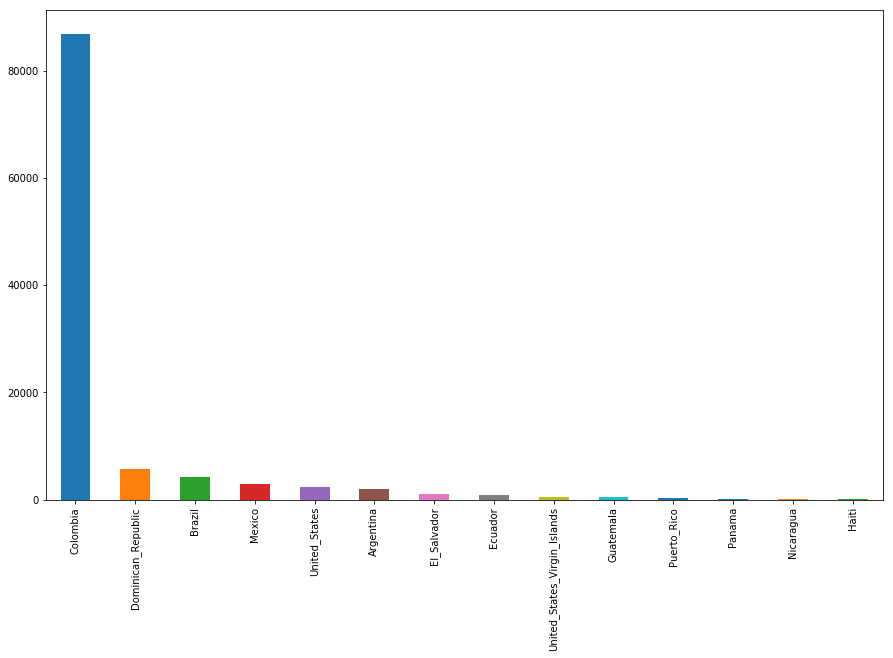

In [41]:
dfZika.country.value_counts()[:30].plot(kind='bar', figsize=(15, 9))

In [33]:
# I want to look for the total number of confirmed Zika cases colum name and plot it.
dfZika.data_field.unique()

array(['cumulative_confirmed_local_cases',
       'cumulative_probable_local_cases',
       'cumulative_confirmed_imported_cases',
       'cumulative_probable_imported_cases',
       'cumulative_cases_under_study', 'cumulative_cases_discarded',
       'microcephaly_under_investigation', 'microcephaly_confirmed',
       'microcephaly_not', 'municipality_microcephaly',
       'microcephaly_fatal_under_investigation',
       'microcephaly_fatal_confirmed', 'microcephaly_fatal_not',
       'municipality_microcephaly_suspected', 'zika_reported',
       'zika_confirmed_laboratory', 'zika_confirmed_clinic',
       'zika_suspected', 'zika_suspected_clinic',
       'total_zika_new_suspected', 'total_zika_new_confirmed_pcr',
       'zika_new_confirmed_pcr_f', 'zika_new_confirmed_pcr_m',
       'efe_reported', 'zika_suspected_cumulative',
       'zika_suspected_pregnant_cumulative',
       'zika_confirmed_pcr_cumulative', 'zika_suspected_pregnant',
       'gbs_reported', 'gbs_zika_confirmed',
   

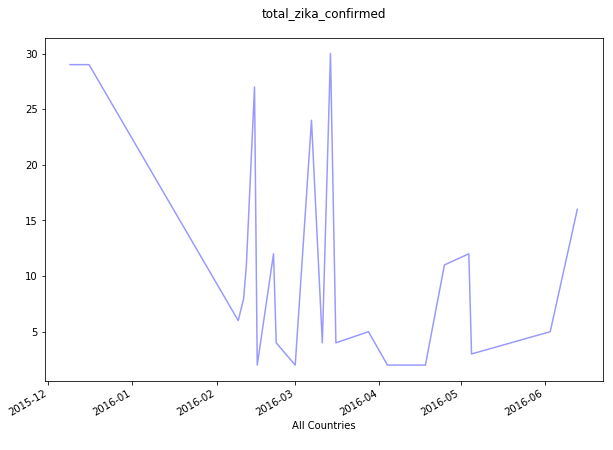

In [34]:
case_series = dfZika[dfZika['data_field'] == 'total_zika_confirmed'].groupby('report_date')['value'].sum()
plt.figure(figsize=(10,7))
confirmed_cases = case_series.plot(kind='line', color='blue', alpha=0.4, title= "total_zika_confirmed\n")
confirmed_cases.set_xlabel("All Countries\n")
plt.show()

In [35]:
#export to csv thw new dataframe to work with Spark in the second part of the assignment
dfZika.to_csv('dfZikaNew.csv',index=False)